In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

#Load the dataset

In [14]:
data = pd.read_csv('retail_sales_data.csv')

In [3]:
data.head()

Date     Sales
0  2019-01-01  20993.43
1  2019-02-01  22861.77
2  2019-03-01  26902.10
3  2019-04-01  29960.95
4  2019-05-01  26415.01

In [4]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

#Decompose into trend, seasonal, and residual components

In [5]:
decomposition = seasonal_decompose(data['Sales'], model='additive', period=12)

#convert the date column to determine type for time series analysis

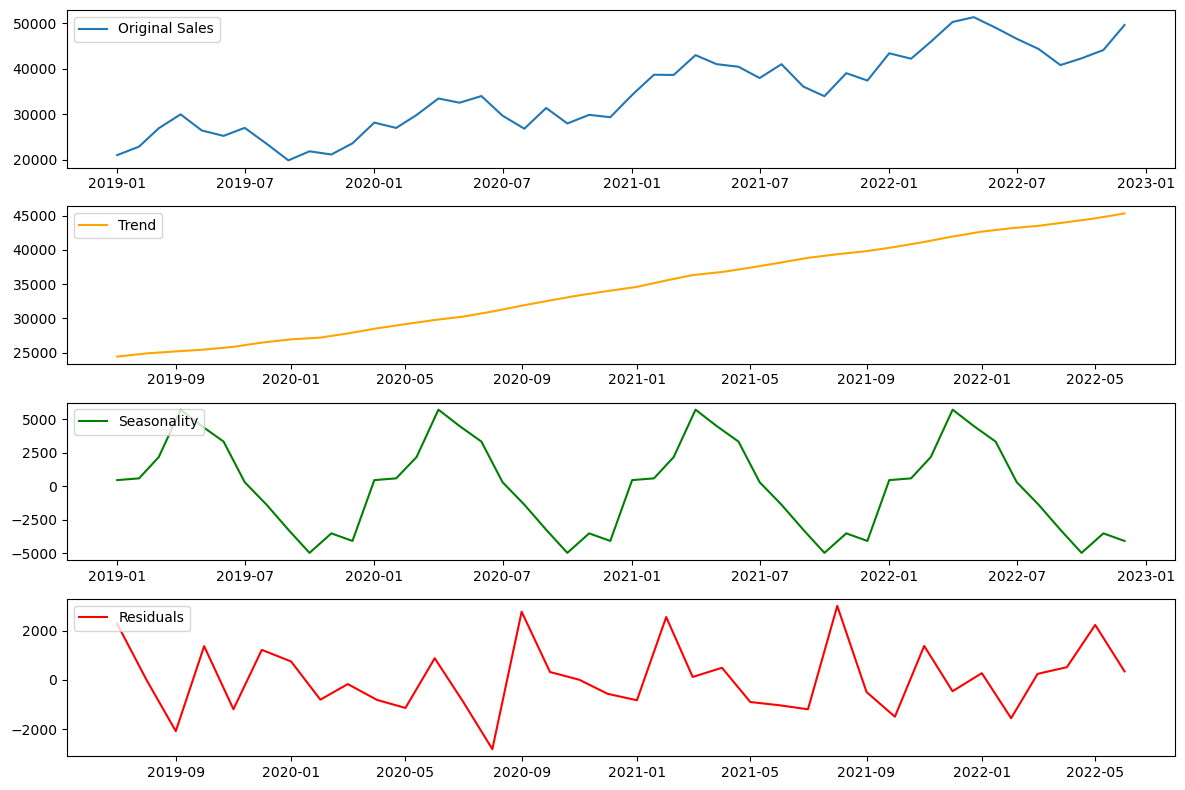

In [6]:
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(data['Sales'], label='Original Sales')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color='orange')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality', color='green')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals', color='red')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

#for checking missing values

In [7]:
adf_test = adfuller(data['Sales'])
print("ADF Test Statistic:", adf_test[0])
print("p-value:", adf_test[1])
print("Critical Values:", adf_test[4])
if adf_test[1] < 0.05:
    print("The series is stationary.")
else:
    print("The series is not stationary, differencing is needed.")

ADF Test Statistic: 1.1848076926896032
p-value: 0.9958792194817764
Critical Values: {'1%': -3.6209175221605827, '5%': -2.9435394610388332, '10%': -2.6104002410518627}
The series is not stationary, differencing is needed.


#modeling evaluation and forecasting

In [8]:
model = ARIMA(data['Sales'], order=(1, 1, 1))
model_fit = model.fit()

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [11]:
forecast = model_fit.get_forecast(steps=12)
forecast_index = pd.date_range(data.index[-1] + pd.DateOffset(months=1), periods=12, freq='MS')
forecast_values = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

In [12]:
forecast_df = pd.DataFrame({
    'Forecast': forecast_values,
    'Lower_CI': forecast_conf_int.iloc[:, 0],
    'Upper_CI': forecast_conf_int.iloc[:, 1]
}, index=forecast_index)

# for Exploratory data analysis checking for seasonality or cyclical patterns in the data.

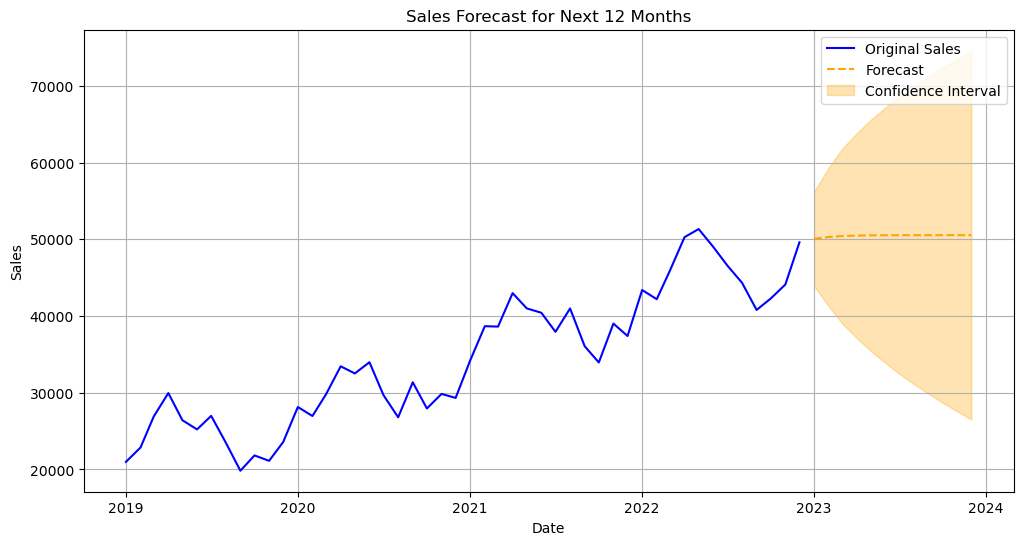

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(data['Sales'], label='Original Sales', color='blue')
plt.plot(forecast_df['Forecast'], label='Forecast', color='orange', linestyle='--')
plt.fill_between(forecast_df.index, forecast_df['Lower_CI'], forecast_df['Upper_CI'], color='orange', alpha=0.3, label='Confidence Interval')
plt.title('Sales Forecast for Next 12 Months')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid()
plt.show()